# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [63]:
#Dependencies
import requests
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from citipy import citipy
# Import API key
from api_keys import weather_api_key



## Generate Cities List

In [2]:
#lat south - 90 eq 0 north 90 55 139   21
#long -180 to 180
cities = []
while len(cities) < 10:
    lat = round(np.random.uniform(-90.0, 90.0),2)
    lon = round(np.random.uniform(-180.0, 180.0),2)
    city = citipy.nearest_city(lat, lon).city_name
    cities.append(city)
    cities = list(set(cities))
print(cities)
len(list(set(cities)))

['rikitea', 'mys shmidta', 'andevoranto', 'beyneu', 'albany', 'vitim', 'bluff', 'katsuura', 'bethel', 'verkhoyansk']


10

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

print("Begining of data retrieval/n-----------------")
cities2 = []
lat = []
lon = []
maxtemp = []
humidity = []
cloudiness =[]
wind = []
country = []
date = []
i = 1
for city in cities:

    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units=metric&appid={weather_api_key}"  
    data = requests.get(url).json()
   
    try:

        lat.append(data["coord"]["lat"])
        lon.append(data["coord"]["lat"])
        maxtemp.append(data["main"]["temp_max"])
        humidity.append(data["main"]["humidity"])
        cloudiness.append(data["clouds"]["all"])
        wind.append(data["wind"]["speed"])
        country.append(data["sys"]["country"])
        date.append(data["dt"])
    except: 
        message = data["message"]
        print(f"{message.capitalize()}. Skipping...")     
    else:
        print(f"Processing Record {i} of Set {len(cities)} | {city}")
        cities2.append(city)
        i +=1
        
citiesdata = {
    'City': cities2,
    'Lat': lat, 
    'Lng': lon, 
    "Max Temp" : maxtemp, 
    "Humidity" : humidity, 
    "Cloudiness" : cloudiness, 
    "Wind Speed": wind, 
    "Country": country,
    "Date" : date
}
# "cod":200

# {"cod":"404","message":"city not found"}

Begining of data retrieval/n-----------------
Processing Record 1 of Set 10 | rikitea
City not found. Skipping...
City not found. Skipping...
Processing Record 2 of Set 10 | beyneu
Processing Record 3 of Set 10 | albany
Processing Record 4 of Set 10 | vitim
Processing Record 5 of Set 10 | bluff
Processing Record 6 of Set 10 | katsuura
Processing Record 7 of Set 10 | bethel
Processing Record 8 of Set 10 | verkhoyansk


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
print(cities)
print(citiesdata)

['rikitea', 'mys shmidta', 'andevoranto', 'beyneu', 'albany', 'vitim', 'bluff', 'katsuura', 'bethel', 'verkhoyansk']
{'City': ['rikitea', 'beyneu', 'albany', 'vitim', 'bluff', 'katsuura', 'bethel', 'verkhoyansk'], 'Lat': [-23.1203, 45.3167, 42.6001, 59.4511, -46.6, 35.1333, 41.3712, 67.5447], 'Lng': [-23.1203, 45.3167, 42.6001, 59.4511, -46.6, 35.1333, 41.3712, 67.5447], 'Max Temp': [25.39, 21.33, 1.67, 1, 8.89, 17.78, 3.33, -4.33], 'Humidity': [72, 34, 86, 96, 88, 55, 94, 72], 'Cloudiness': [16, 15, 100, 100, 89, 58, 100, 100], 'Wind Speed': [4.77, 4.38, 1.03, 8.76, 3.58, 5.78, 0.89, 4.01], 'Country': ['PF', 'KZ', 'US', 'RU', 'NZ', 'JP', 'US', 'RU'], 'Date': [1618557084, 1618557085, 1618557086, 1618557086, 1618557086, 1618557086, 1618557086, 1618557086]}


In [16]:
df1 = pd.DataFrame(citiesdata)
df1.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-23.1203,25.39,72,16,4.77,PF,1618557084
1,beyneu,45.3167,45.3167,21.33,34,15,4.38,KZ,1618557085
2,albany,42.6001,42.6001,1.67,86,100,1.03,US,1618557086
3,vitim,59.4511,59.4511,1.00,96,100,8.76,RU,1618557086
4,bluff,-46.6000,-46.6000,8.89,88,89,3.58,NZ,1618557086


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
if len(df1[df1["Humidity"]>80] == 0):
    print(0)
else:
    over100 = (df1[df1["Humidity"]>80]).index
    

0


In [51]:
#  Get the indices of cities that have humidity over 100%.
try:
    over100 = (df1[df1["Humidity"]>80]).index
    clean_city_data = df1.drop(over100, inplace = False)
    droppedcities = df1.loc[over100]["City"]
    print(", ".join(droppedcities) + " have been removed as humidity was >100%")
except:
    print()
    clean_city_data = df1

albany, vitim, bluff, bethel have been removed as humidity was >100%


albany, vitim, bluff, bethel were dropped


In [52]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-23.1203,25.39,72,16,4.77,PF,1618557084
1,beyneu,45.3167,45.3167,21.33,34,15,4.38,KZ,1618557085
5,katsuura,35.1333,35.1333,17.78,55,58,5.78,JP,1618557086
7,verkhoyansk,67.5447,67.5447,-4.33,72,100,4.01,RU,1618557086


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

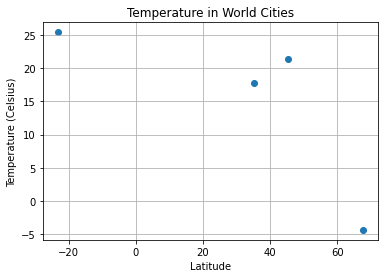

In [56]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()



## Latitude vs. Humidity Plot

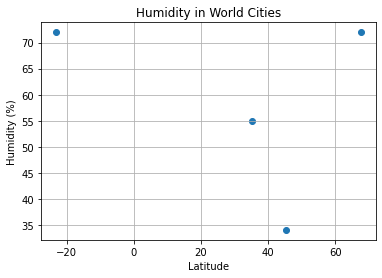

In [57]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

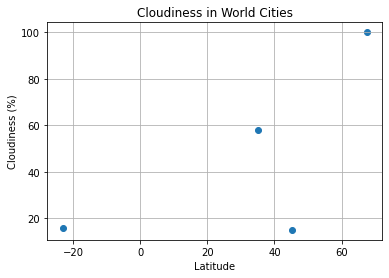

In [58]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

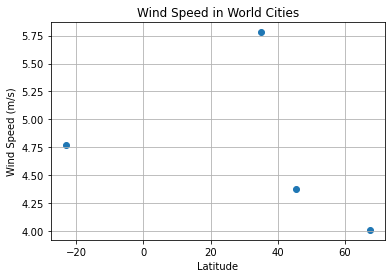

In [59]:
# Build a scatter plot for each data type
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

## Linear Regression

In [64]:
northerncities = clean_city_data[clean_city_data["Lat"] >= 0]
southerncities = clean_city_data[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

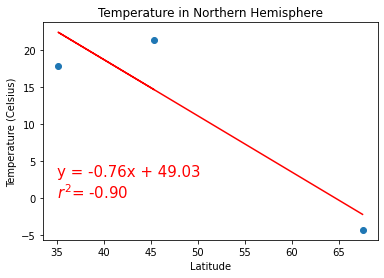

In [69]:
# Add the linear regression equation and line to plot
x_values = northerncities['Lat']
y_values = northerncities['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line = f"y = {slope:.2f}x + {intercept:.2f}\n$r^{2}$= {rvalue:.2f}" 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line,(35,0),fontsize=15,color="red")
plt.title("Temperature in Northern Hemisphere")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression